In [1]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.datasets import load_iris
 
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y = pd.Series(iris.target)
y.name = 'variety'

In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: variety, dtype: int64

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [12]:
X1 = X[['petal length (cm)','sepal width (cm)']]
tree = DecisionTreeClassifier()
tree.fit(X1, y)

DecisionTreeClassifier()

In [13]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    X = X.values
    y = y.values
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


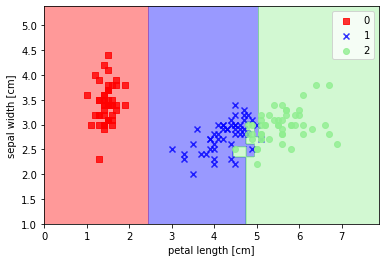

In [14]:
plot_decision_regions(X1, y, tree)
 
plt.xlabel('petal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='best')

In [16]:
tree2 = DecisionTreeClassifier()
tree2.fit(X, y)

DecisionTreeClassifier()

In [17]:
tree2.score(X, y)

1.0

In [18]:
tree3 = DecisionTreeClassifier(max_depth=2)
tree3.fit(X, y,)

DecisionTreeClassifier(max_depth=2)

In [19]:
tree3.score(X, y)

0.96

In [20]:
importance = pd.DataFrame({"feature_names":X.columns, "importance":tree2.feature_importances_})
importance

,feature_names,importance
0,sepal length (cm),0.013333
1,sepal width (cm),0.000000
2,petal length (cm),0.064056
3,petal width (cm),0.922611


In [25]:
importance.sort_values(by=['importance'], ascending=False)

,feature_names,importance
3,petal width (cm),0.922611
2,petal length (cm),0.064056
0,sepal length (cm),0.013333
1,sepal width (cm),0.000000
